# Data-Driven Analysis and Prediction of Stock Market Performance for Top 10 Companies (2017-2022)

# Importing the libraries

In [1]:
# import necessary libraries and specify that graphs should be plotted inline
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [2]:
df = pd.read_csv('ZAll_Combine_Stock_Histry.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,07-08-2017,39.264999,39.730000,39.167500,39.702499,37.585022,87481200,AAPL
1,08-08-2017,39.650002,40.457500,39.567501,40.020000,37.885582,144823600,AAPL
2,09-08-2017,39.814999,40.317501,39.777500,40.264999,38.117512,104526000,AAPL
3,10-08-2017,39.974998,40.000000,38.657501,38.830002,36.903397,163217200,AAPL
4,11-08-2017,39.150002,39.642502,39.017502,39.369999,37.416603,105028400,AAPL
...,...,...,...,...,...,...,...,...
12575,29-07-2022,128.320007,132.259995,128.009995,132.050003,132.050003,10045500,WLMART
12576,01-08-2022,131.059998,134.229996,131.000000,132.539993,132.539993,8332100,WLMART
12577,02-08-2022,133.149994,133.710007,131.399994,132.679993,132.679993,6565000,WLMART
12578,03-08-2022,132.160004,132.940002,129.860001,130.500000,130.500000,10667700,WLMART


In [4]:
## data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12580 entries, 0 to 12579
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       12580 non-null  object 
 1   Open       12580 non-null  float64
 2   High       12580 non-null  float64
 3   Low        12580 non-null  float64
 4   Close      12580 non-null  float64
 5   Adj Close  12580 non-null  float64
 6   Volume     12580 non-null  int64  
 7   Company    12580 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 786.4+ KB


In [5]:
## Dimensions of the data

df.shape

(12580, 8)

In [6]:
## show the head of data

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,07-08-2017,39.264999,39.730000,39.167500,39.702499,37.585022,87481200,AAPL
1,08-08-2017,39.650002,40.457500,39.567501,40.020000,37.885582,144823600,AAPL
2,09-08-2017,39.814999,40.317501,39.777500,40.264999,38.117512,104526000,AAPL
3,10-08-2017,39.974998,40.000000,38.657501,38.830002,36.903397,163217200,AAPL
4,11-08-2017,39.150002,39.642502,39.017502,39.369999,37.416603,105028400,AAPL


In [7]:
## show the tail of data

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
12575,29-07-2022,128.320007,132.259995,128.009995,132.050003,132.050003,10045500,WLMART
12576,01-08-2022,131.059998,134.229996,131.000000,132.539993,132.539993,8332100,WLMART
12577,02-08-2022,133.149994,133.710007,131.399994,132.679993,132.679993,6565000,WLMART
12578,03-08-2022,132.160004,132.940002,129.860001,130.500000,130.500000,10667700,WLMART
12579,04-08-2022,130.669998,130.800003,125.330002,125.570000,125.570000,17702000,WLMART


In [8]:
## show the variables in the data

df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Company'],
      dtype='object')

# Removing the duplicate records

In [9]:
df.drop_duplicates()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,07-08-2017,39.264999,39.730000,39.167500,39.702499,37.585022,87481200,AAPL
1,08-08-2017,39.650002,40.457500,39.567501,40.020000,37.885582,144823600,AAPL
2,09-08-2017,39.814999,40.317501,39.777500,40.264999,38.117512,104526000,AAPL
3,10-08-2017,39.974998,40.000000,38.657501,38.830002,36.903397,163217200,AAPL
4,11-08-2017,39.150002,39.642502,39.017502,39.369999,37.416603,105028400,AAPL
...,...,...,...,...,...,...,...,...
12575,29-07-2022,128.320007,132.259995,128.009995,132.050003,132.050003,10045500,WLMART
12576,01-08-2022,131.059998,134.229996,131.000000,132.539993,132.539993,8332100,WLMART
12577,02-08-2022,133.149994,133.710007,131.399994,132.679993,132.679993,6565000,WLMART
12578,03-08-2022,132.160004,132.940002,129.860001,130.500000,130.500000,10667700,WLMART


# Identifying the Missing values

In [10]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
dtype: int64

In [11]:
## check rows with null values

rows = df.isnull().any(axis=1)
rows_null = df[rows]
rows_null

,Date,Open,High,Low,Close,Adj Close,Volume,Company


# Univariate Analysis for Numerical variables - Statistical methods

In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,12580.000000,12580.000000,12580.000000,12580.000000,12580.000000,1.258000e+04
mean,171.650511,174.152626,169.017963,171.651667,169.729752,3.977808e+07
std,160.986591,164.374458,157.251344,160.876030,161.483350,4.359162e+07
min,31.622499,32.494999,31.115000,31.770000,31.554657,1.144000e+06
25%,80.895001,81.603002,79.991875,80.970875,78.738447,9.803300e+06
50%,124.880001,126.271248,123.320000,124.979999,122.454689,2.466310e+07
75%,184.313126,186.727505,181.885002,184.715004,183.013229,5.338752e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,4.265100e+08


# Univariate Analysis for Numerical variables - Graphical methods

In [13]:
companies = df['Company'].unique()
dates = df['Date'].unique()

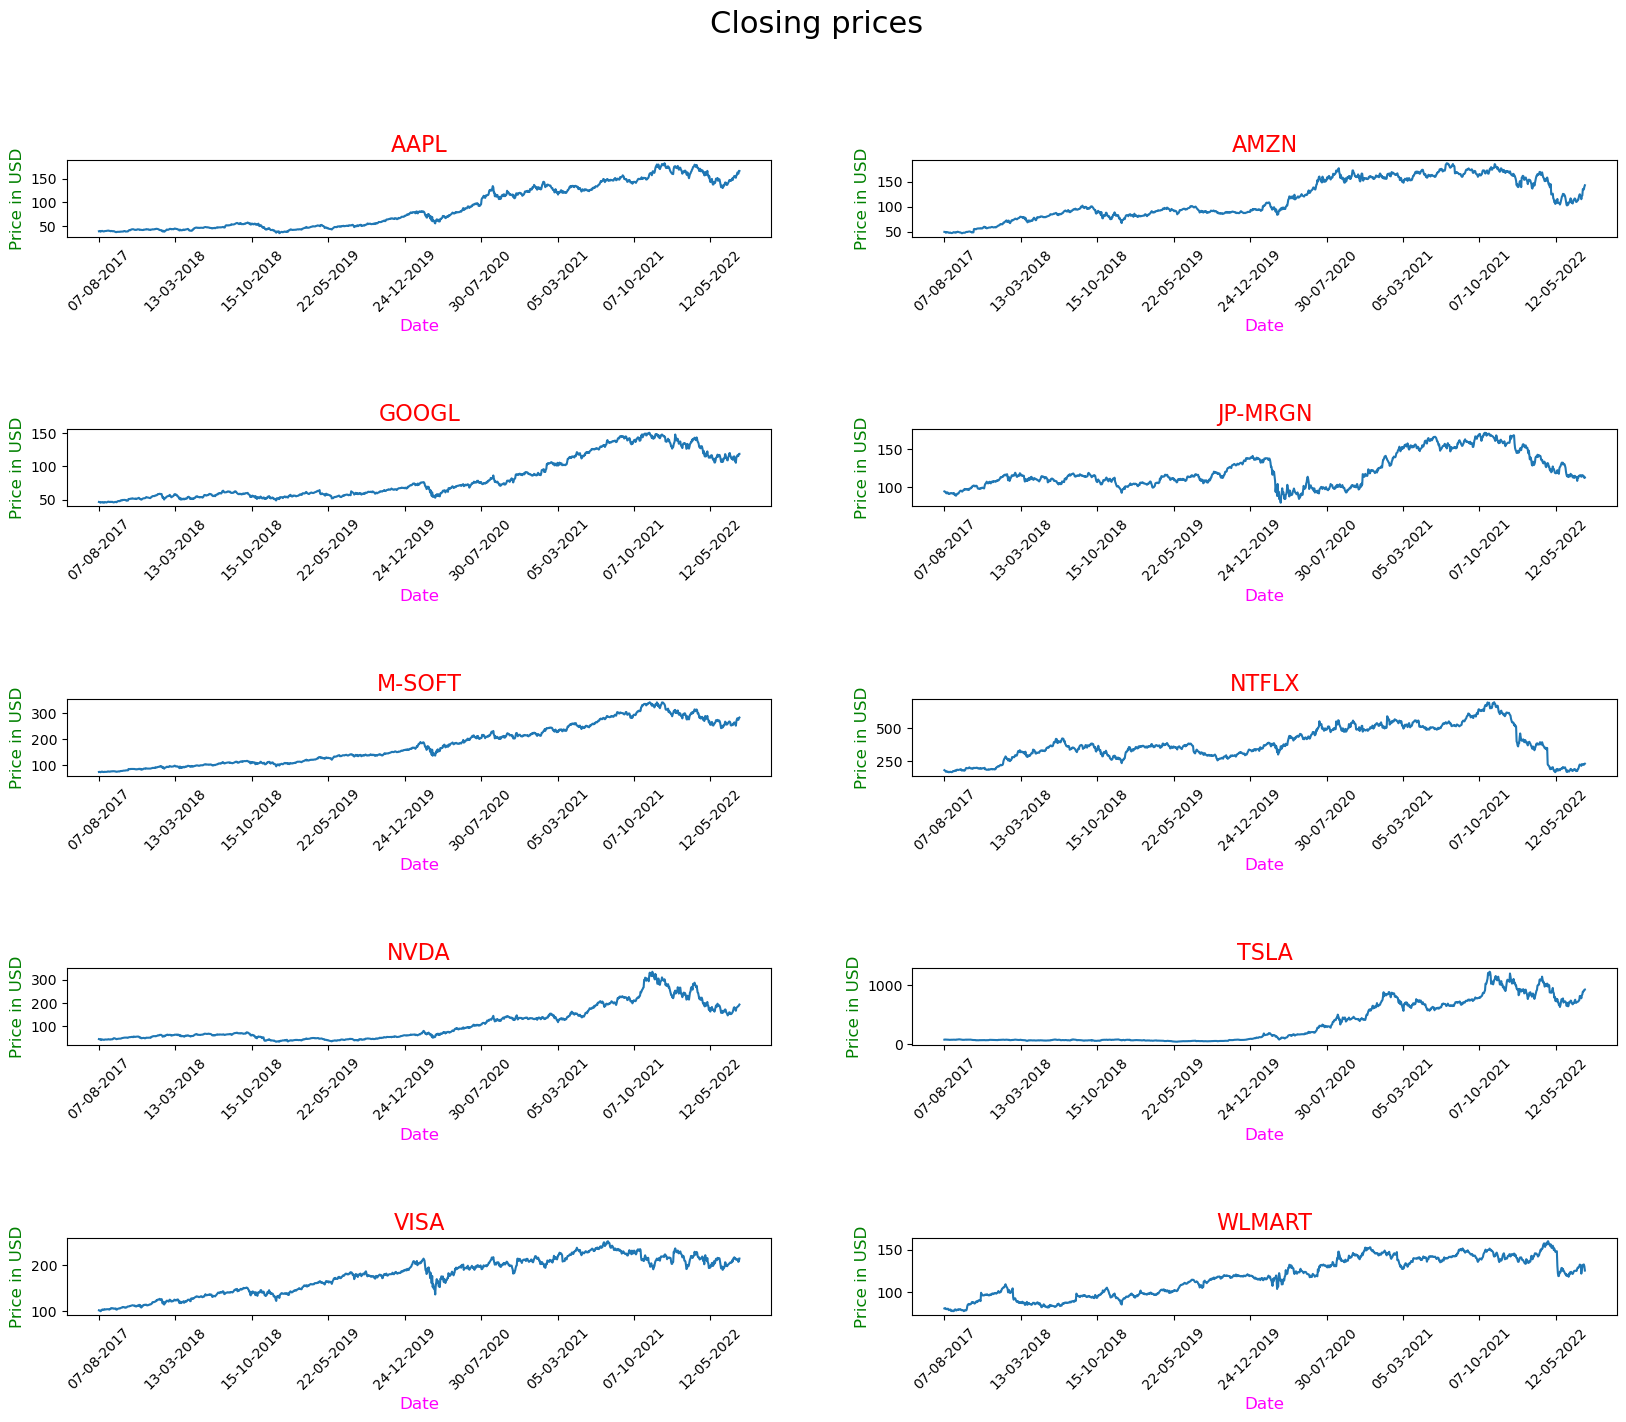

In [14]:
# subplots of 10 company's Stock close value with date


fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 15))
plt.subplots_adjust(hspace=2.5)
fig.suptitle("Closing prices", fontsize=22)

# loop through companies and axes


for comp, ax in zip(companies, axs.ravel()):
    ax.plot(dates,df[df['Company']==comp]["Close"])
    # chart formatting
    xticks = dates[::150]
    ax.set_xticks(xticks, rotation=45)
    ax.set_title(comp.upper(), fontsize=16, color = 'r')
    ax.set_xticklabels(xticks,rotation=45)
    ax.set_xlabel("Date", fontsize=12, color = 'magenta')
    ax.set_ylabel('Price in USD', fontsize = 12, color = 'g')
    

plt.show()

# Multivariate Analysis for Numerical variables - Graphical methods

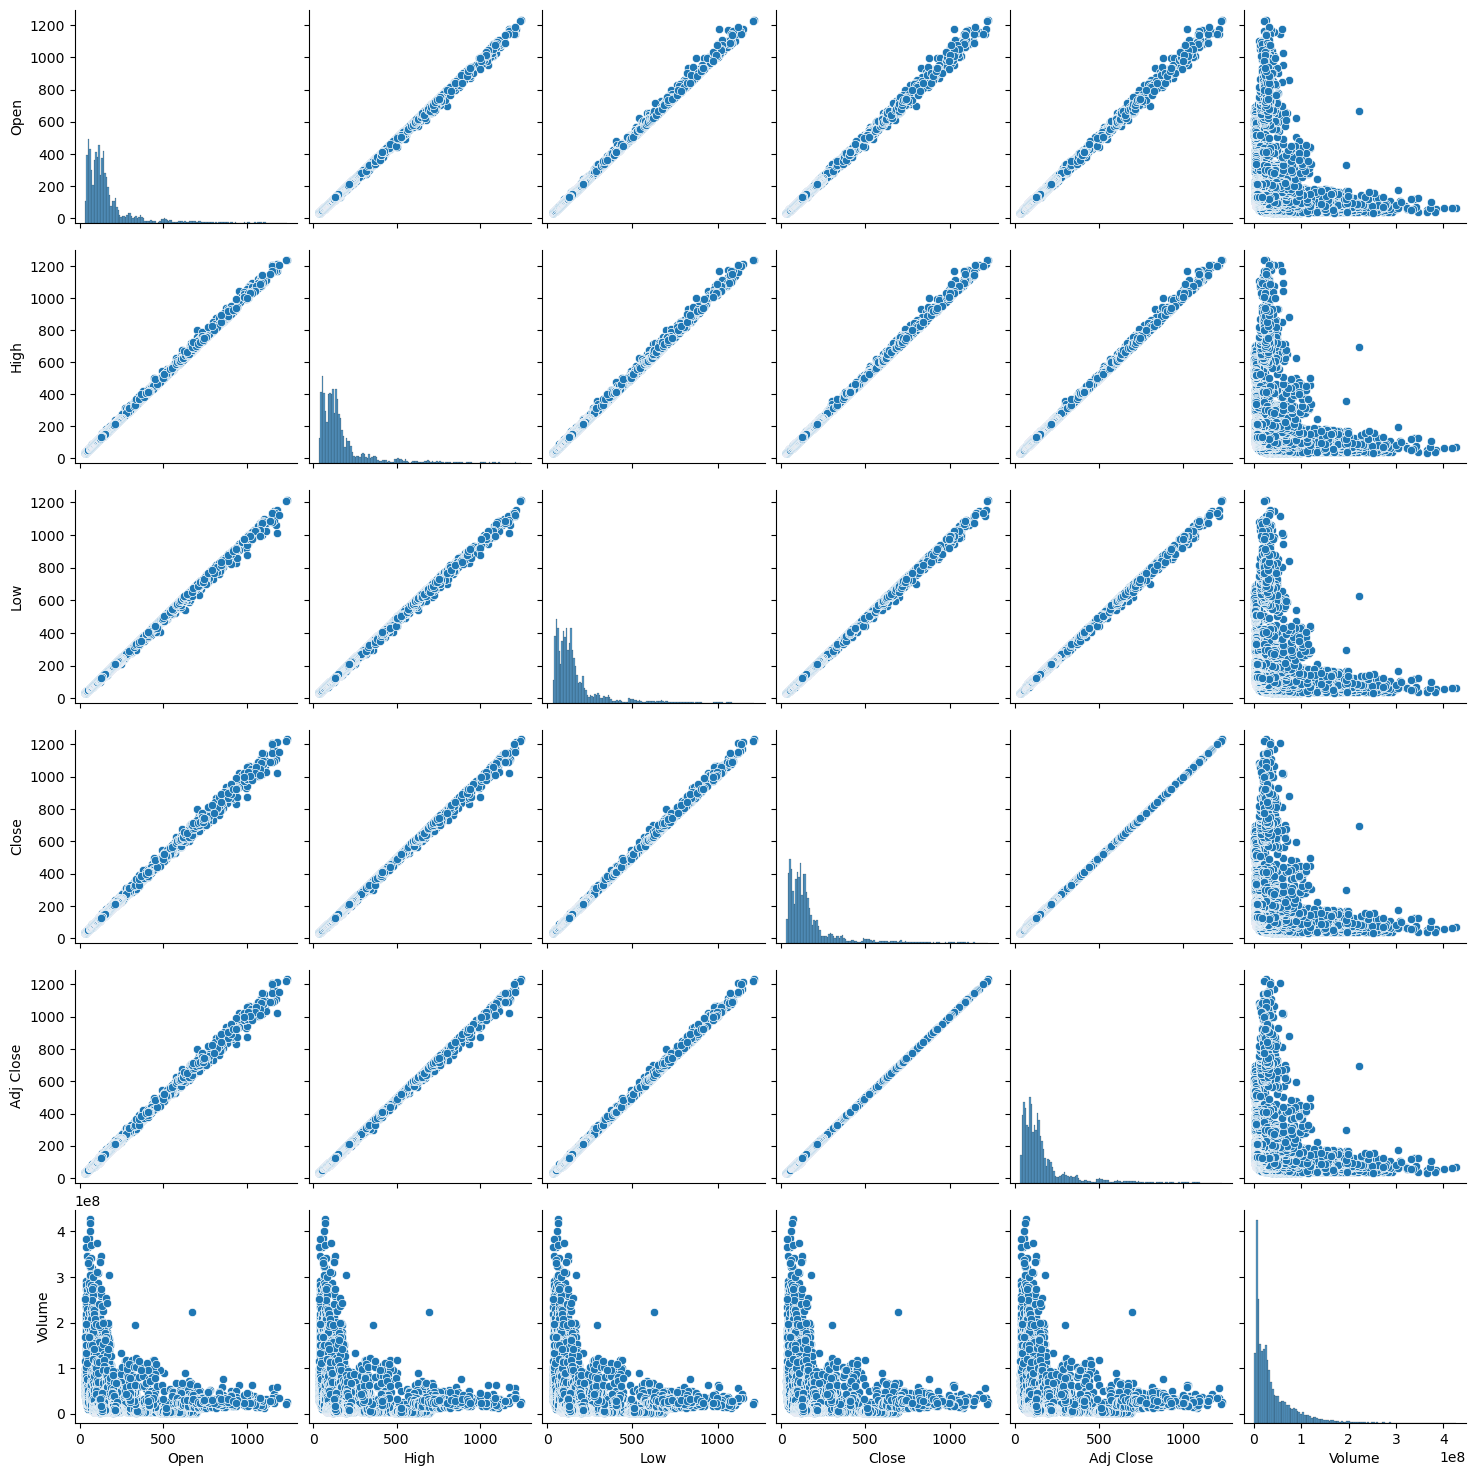

In [15]:
# Pairplot depicts the trend of each column with respect to others. It only considers numerical values.
sns.pairplot(df)
plt.show()

# Correlation Matrix

In [16]:
corr_df = df.corr()

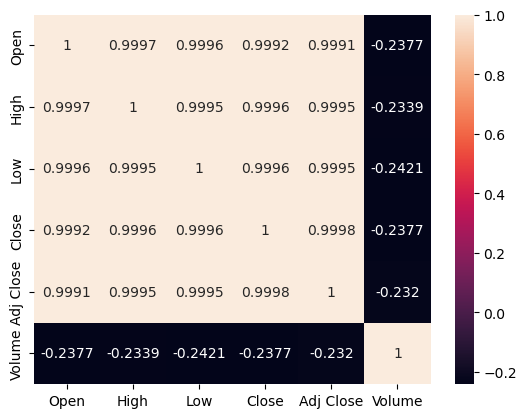

'\nfig, ax = plt.subplots(figsize=(8,8)) \nsns.heatmap(corr_df, annot=True, ax=ax)\nplt.show()'

In [17]:
# Heat Map with Correlation matrix. Positive values close to 1 indicate strong direct linear correlation 
# used for feature selection
# Negative values indicate inverse correlation

sns.heatmap(corr_df,annot=True, fmt = '0.4g')
plt.show()
'''
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(corr_df, annot=True, ax=ax)
plt.show()'''

# Formatting the DataFrame

In [54]:
# Coverting the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [55]:
df['Company'].replace('JP-MRGN', 'JPMRGN', inplace=True)
df['Company'].replace('M-SOFT', 'MSOFT', inplace=True)

# Getting dummy variables for Company Variable

In [56]:
df['Company'].unique()

array(['AAPL', 'AMZN', 'GOOGL', 'JPMRGN', 'MSOFT', 'NTFLX', 'NVDA',
       'TSLA', 'VISA', 'WLMART'], dtype=object)

In [57]:
df_dummy= pd.get_dummies(df, columns=['Company'])

In [58]:
df_dummy

,Date,Open,High,Low,Close,Adj Close,Volume,Company_AAPL,Company_AMZN,Company_GOOGL,Company_JPMRGN,Company_MSOFT,Company_NTFLX,Company_NVDA,Company_TSLA,Company_VISA,Company_WLMART
0,2017-08-07,39.264999,39.730000,39.167500,39.702499,37.585022,87481200,1,0,0,0,0,0,0,0,0,0
1,2017-08-08,39.650002,40.457500,39.567501,40.020000,37.885582,144823600,1,0,0,0,0,0,0,0,0,0
2,2017-08-09,39.814999,40.317501,39.777500,40.264999,38.117512,104526000,1,0,0,0,0,0,0,0,0,0
3,2017-08-10,39.974998,40.000000,38.657501,38.830002,36.903397,163217200,1,0,0,0,0,0,0,0,0,0
4,2017-08-11,39.150002,39.642502,39.017502,39.369999,37.416603,105028400,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12575,2022-07-29,128.320007,132.259995,128.009995,132.050003,132.050003,10045500,0,0,0,0,0,0,0,0,0,1
12576,2022-08-01,131.059998,134.229996,131.000000,132.539993,132.539993,8332100,0,0,0,0,0,0,0,0,0,1
12577,2022-08-02,133.149994,133.710007,131.399994,132.679993,132.679993,6565000,0,0,0,0,0,0,0,0,0,1
12578,2022-08-03,132.160004,132.940002,129.860001,130.500000,130.500000,10667700,0,0,0,0,0,0,0,0,0,1


In [59]:
df_dummy.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Company_AAPL', 'Company_AMZN', 'Company_GOOGL', 'Company_JPMRGN',
       'Company_MSOFT', 'Company_NTFLX', 'Company_NVDA', 'Company_TSLA',
       'Company_VISA', 'Company_WLMART'],
      dtype='object')

# Linear Regression Model

In [60]:
var=['Open', 'Volume',
       'Company_AAPL', 'Company_AMZN', 'Company_GOOGL', 'Company_JPMRGN',
       'Company_MSOFT', 'Company_NTFLX', 'Company_NVDA', 'Company_TSLA',
       'Company_VISA']
x = df_dummy[var]
y= df_dummy['Close']


In [61]:
print(x.shape)
print(x.shape)

(12580, 11)
(12580, 11)


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=5)

In [63]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8806, 11), (3774, 11), (8806,), (3774,))

In [64]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [65]:
linear_model.fit(X_train, Y_train)

LinearRegression()

In [66]:
linear_model.coef_, linear_model.intercept_

(array([ 9.97467304e-01, -2.04959729e-10, -4.50337243e-02, -1.30609038e-01,
        -1.36655397e-01, -1.02625647e-01,  1.00550538e-01,  3.68659923e-01,
        -7.97111306e-02,  3.66940270e-01,  4.22199581e-02]),
 0.394523052381345)

In [67]:
print("Co-efficents of linear model: ")

for i in range(len(var)):
  print('{} : {}'.format(var[i], linear_model.coef_[i].transpose()) )

print("\n Intercept = ", linear_model.intercept_)

Co-efficents of linear model: 
Open : 0.997467303553913
Volume : -2.0495972858322942e-10
Company_AAPL : -0.045033724335517486
Company_AMZN : -0.1306090379038141
Company_GOOGL : -0.13665539699037138
Company_JPMRGN : -0.10262564715478674
Company_MSOFT : 0.10055053831750548
Company_NTFLX : 0.368659923464483
Company_NVDA : -0.079711130641273
Company_TSLA : 0.3669402703276045
Company_VISA : 0.04221995808117321

 Intercept =  0.394523052381345


In [68]:
y_pred_linear = linear_model.predict(X_test)

In [69]:
linear_pred_csv = pd.DataFrame(columns=['Date'])



In [71]:
y_pred_train = linear_model.predict(X_train)
residuals_train = Y_train - y_pred_train
MAE_train = np.abs(residuals_train).mean()

y_pred_test = linear_model.predict(X_test)
residuals_test = Y_test - y_pred_test
MAE_test = np.abs(residuals_test).mean()

print("Mean Absolute Error(Train): {} \nMean Absolute Error(Test): {} ".format(MAE_train, MAE_test))


Mean Absolute Error(Train): 2.548942431953948 
Mean Absolute Error(Test): 2.765379890435024 


In [72]:
MSE_train = (residuals_train**2).mean()
MSE_test = (residuals_test**2).mean()

print("Mean Squared Error(Train): {} \nMean Squared Error(Test): {} ".format(MSE_train, MSE_test))


Mean Squared Error(Train): 36.7596336857296 
Mean Squared Error(Test): 46.93350652190433 


In [73]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

RMSE_train, RMSE_test

(6.062972347432371, 6.850803348652209)

In [74]:
print("R-squared (train): ",linear_model.score(X_train,Y_train))

R-squared (train):  0.9985286978510184


In [75]:
print("R-squared (test): ",linear_model.score(X_test,Y_test))

R-squared (test):  0.9983203350062264


Text(0.5, 1.0, 'Linear Regression Model')

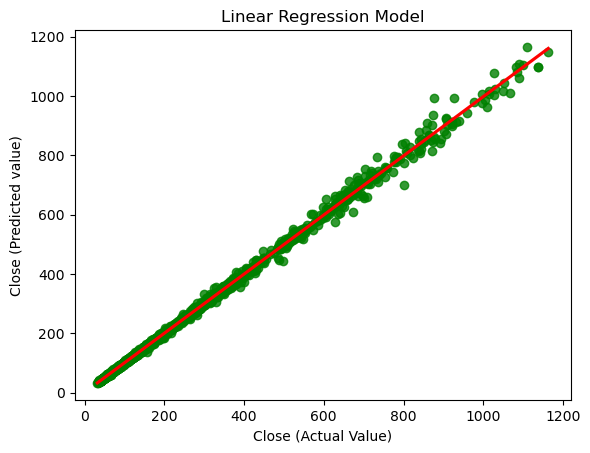

In [78]:

sns.regplot(x=Y_test,y=y_pred_linear,ci=None,scatter_kws={"color": "green"}, line_kws={"color": "red"});
plt.xlabel('Close (Actual Value)')
plt.ylabel('Close (Predicted value)')
plt.title('Linear Regression Model')

# Panel Data Analysis

## PooledOLS Model

In [79]:
import pandas as pd
from linearmodels.panel import PanelOLS
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white


In [80]:
# Define the variables for the model
var = ['Open', 'Volume', 'Company_AAPL', 'Company_AMZN', 'Company_GOOGL', 
       'Company_JPMRGN', 'Company_MSOFT', 'Company_NTFLX', 'Company_NVDA', 
       'Company_TSLA', 'Company_VISA']
x = df_dummy[var]
y = df_dummy['Close']


In [81]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [82]:
pooled_y = y_train
pooled_x = X_train

pooled_x = add_constant(pooled_x)

In [83]:
pooled_ols_model = sm.OLS(endog = pooled_y, exog = pooled_x)

In [84]:
pooledolsmodel = pooled_ols_model.fit()

In [85]:
print(pooledolsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 5.157e+05
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        14:49:47   Log-Likelihood:                -28689.
No. Observations:                8806   AIC:                         5.740e+04
Df Residuals:                    8794   BIC:                         5.749e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2123      0.220      0.

 

* The R-squared value of 0.998 indicates that the model is able to explain 99.8% of the variation in the "Close" price using the input features. This is a very high value, suggesting that the model is a good fit for the data.

* The "coef" column gives the estimated coefficients for each of the input features. For example, the coefficient for "Open" is 0.9988, which means that for every $1 increase in the "Open" price, the model predicts a $0.9988 increase in the "Close" price. 

* The "std err" column gives the standard error of each coefficient estimate, which can be used to calculate the t-statistic and p-value for each coefficient. The p-value tells us whether each coefficient is statistically significant (i.e., whether we can reject the null hypothesis that the coefficient is zero). 

* In this model, only the "Open" feature has a statistically significant coefficient (p-value < 0.05). The coefficients for the "Volume" and most of the "Company" features are not significant (p-value > 0.05). However, it's worth noting that the "Company" features are categorical variables, so their coefficients represent the difference in the "Close" price between each company and the reference category (which is not included in the model output).

In [86]:
# checking the heteroskedasticity

whites_test = het_white(pooledolsmodel.resid, pooledolsmodel.model.exog)

# print results
print("White test statistics: ", lzip(['LM statistic', 'LM-Test p-value', 'F-Test p-value'], whites_test))

White test statistics:  [('LM statistic', 2407.9657754470445), ('LM-Test p-value', 0.0), ('F-Test p-value', 275.77797492668253)]


* The LM statistic is 2407.96 and the LM-Test p-value is 0.00, which indicates that the null hypothesis of correct specification is rejected at any reasonable significance level. The F-Test p-value is 275.77, which is also very low and indicates strong evidence against the null hypothesis of no heteroskedasticity.

* The White test indicates that there is significant heteroskedasticity in the model residuals.

In [88]:
# checking the Autocorrelation
dw = sm.stats.stattools.durbin_watson(pooledolsmodel.resid)

print("Durbin-Watson test statistic:", dw)

Durbin-Watson test statistic: 1.9755482595068417


* This indicates that there is a slight positive autocorrelation in the residuals.

* After observing the output of pooled OLS model and diagnostic test, Pooled OLS model is not good for this dataset. Fixed-effect model or Random-effects should be used in this case.

## Fixed- Effects(FE) Model. 

In [89]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [90]:
df_panel = df.copy()

In [91]:
unit_col_name='Company'
time_period_col_name='Date'
 
#Create the dummy variables, one for each country
df_dummies = pd.get_dummies(df_panel[unit_col_name])


df_panel_with_dummies = df_panel.join(df_dummies)
df_panel_with_dummies['date_FE'] = pd.Categorical(df_panel_with_dummies[time_period_col_name]).codes



* The 'Categorical' class is used to represent data that has a finite number of possible values or categories. In this case, it is used to represent the different time periods in the 'time_period_col_name' column.The 'codes' function of the 'Categorical' class returns an array of codes for the categories in the 'Categorical' object. These codes are integers ranging from 0 to n-1, where n is the number of unique categories in the 'Categorical' object.By assigning these codes to the 'date_FE' column, we create a new column that represents the time periods using integer codes instead of the original values.

In [92]:
y_var_name = 'Close'
X_var_names = ['Open', 'Volume', 'date_FE']
df_panel_with_dummies.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Company', 'AAPL', 'AMZN', 'GOOGL', 'JPMRGN', 'MSOFT', 'NTFLX', 'NVDA',
       'TSLA', 'VISA', 'WLMART', 'date_FE'],
      dtype='object')

In [93]:
unit_names = ['AAPL', 'AMZN', 'GOOGL', 'JPMRGN', 'MSOFT', 'NTFLX',
       'NVDA', 'TSLA', 'VISA', 'WALMART']
unit_names.sort()

* Leaving out one dummy variable so as to avoid perfect Multicollinearity

In [94]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name
 
print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=Close ~ Open + Volume + date_FE + AAPL + AMZN + GOOGL + JPMRGN + MSOFT + NTFLX + NVDA + TSLA + VISA


In [95]:
from sklearn.model_selection import train_test_split

# Split the data into X and y variables
X = df_panel_with_dummies[['Open', 'Volume','date_FE', 'AAPL', 'AMZN', 'GOOGL', 'JPMRGN', 'MSOFT', 'NTFLX', 'NVDA', 'TSLA', 'VISA']]
y = df_panel_with_dummies['Close']


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [96]:
df_panel_with_dummies_train  =  X_train.join(y_train)
df_panel_with_dummies_test = X_test.join(y_test)

In [97]:
df_panel_with_dummies_train.columns

Index(['Open', 'Volume', 'date_FE', 'AAPL', 'AMZN', 'GOOGL', 'JPMRGN', 'MSOFT',
       'NTFLX', 'NVDA', 'TSLA', 'VISA', 'Close'],
      dtype='object')

In [98]:
Predicted_csv = X_test.copy(deep = True)


In [99]:
df_panel_with_dummies_test


,Open,Volume,date_FE,AAPL,AMZN,GOOGL,JPMRGN,MSOFT,NTFLX,NVDA,TSLA,VISA,Close
4447,96.919998,42055900,673,0,0,0,1,0,0,0,0,0,102.760002
9578,444.609985,118374400,772,0,0,0,0,0,0,0,1,0,498.320007
3060,59.594501,23248000,544,0,0,1,0,0,0,0,0,0,60.450001
8850,69.930000,37468500,44,0,0,0,0,0,0,0,1,0,68.587997
11101,216.960007,8822600,1037,0,0,0,0,0,0,0,0,1,220.050003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6214,278.910004,20778000,1182,0,0,0,0,1,0,0,0,0,280.519989
9469,109.477997,86903500,663,0,0,0,0,0,0,0,1,0,105.632004
10211,121.959999,6948900,147,0,0,0,0,0,0,0,0,1,122.220001
12513,155.809998,7029600,1191,0,0,0,0,0,0,0,0,0,152.990005


In [100]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_panel_with_dummies_train)
lsdv_model_FE = lsdv_model.fit()
print(lsdv_model_FE.summary())


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.729e+05
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        14:54:21   Log-Likelihood:                -28687.
No. Observations:                8806   AIC:                         5.740e+04
Df Residuals:                    8793   BIC:                         5.749e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0546      0.240      0.228      0.8

In [101]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(lsdv_model_FE.model.exog, i) for i in range(lsdv_model_FE.model.exog.shape[1])]
vif["features"] = lsdv_model_FE.model.exog_names

# Calculate condition number
condition_number = np.linalg.cond(lsdv_model_FE.model.exog)

vif['Tolerance'] = 1/vif['VIF Factor']

print("Variance Inflation Factors:\n", vif)

Variance Inflation Factors:
     VIF Factor   features  Tolerance
0    12.804065  Intercept   0.078100
1     2.419085       Open   0.413379
2     2.876228     Volume   0.347678
3     1.438639    date_FE   0.695101
4     3.435389       AAPL   0.291088
5     2.570275       AMZN   0.389063
6     1.842860      GOOGL   0.542635
7     1.771457     JPMRGN   0.564507
8     1.859892      MSOFT   0.537666
9     2.377801      NTFLX   0.420557
10    1.967740       NVDA   0.508197
11    2.419771       TSLA   0.413262
12    1.802722       VISA   0.554717


* After observing the results of VIF test, by observing the tolerance values     only Intercept is correlated with other independent and dummy variables which   is normal. 

* Since other values of tolerance are not almost equal to 0 we can say that all   the other variable are not significantly correlated with each other. So there   is no multicolinearity problem with this model

In [102]:
y_pred_FE = lsdv_model_FE.predict(X_test)


In [103]:
y_pred_FE = y_pred_FE.reset_index(drop=True)


In [104]:
for i in range(X_test.shape[0]):
    Predicted_csv.loc[X_test.iloc[i].name,'Date'] = df_panel.iloc[X_test.iloc[i].name]['Date']
    Predicted_csv.loc[X_test.iloc[i].name,'Company'] = df_panel.iloc[X_test.iloc[i].name]['Company']
    Predicted_csv.loc[X_test.iloc[i].name,'Predicted_Close'] = y_pred_FE.iloc[i]

In [105]:
# Predicted_csv.to_csv('predicted_data.csv', index=False)


In [106]:
Predicted_csv

,Open,Volume,date_FE,AAPL,AMZN,GOOGL,JPMRGN,MSOFT,NTFLX,NVDA,TSLA,VISA,Date,Company,Predicted_Close
4447,96.919998,42055900,673,0,0,0,1,0,0,0,0,0,2020-04-09,JPMRGN,96.945646
9578,444.609985,118374400,772,0,0,0,0,0,0,0,1,0,2020-08-31,TSLA,444.556355
3060,59.594501,23248000,544,0,0,1,0,0,0,0,0,0,2019-10-04,GOOGL,59.645931
8850,69.930000,37468500,44,0,0,0,0,0,0,0,1,0,2017-10-09,TSLA,70.462132
11101,216.960007,8822600,1037,0,0,0,0,0,0,0,0,1,2021-09-20,VISA,216.938898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6214,278.910004,20778000,1182,0,0,0,0,1,0,0,0,0,2022-04-18,MSOFT,278.986609
9469,109.477997,86903500,663,0,0,0,0,0,0,0,1,0,2020-03-26,TSLA,110.048285
10211,121.959999,6948900,147,0,0,0,0,0,0,0,0,1,2018-03-08,VISA,121.783002
12513,155.809998,7029600,1191,0,0,0,0,0,0,0,0,0,2022-04-29,WLMART,156.011951


Text(0.5, 1.0, 'Fixed Effects Model')

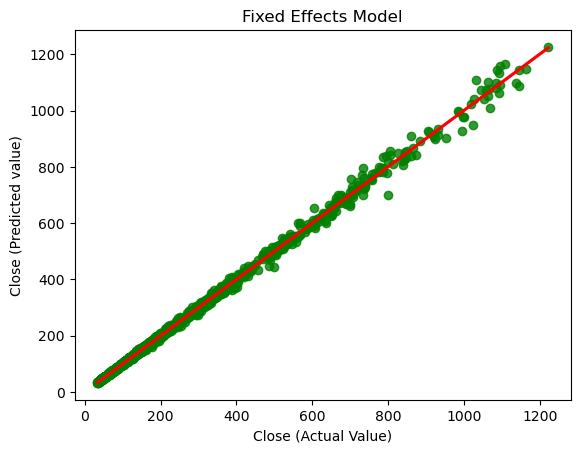

In [107]:
sns.regplot(x=y_test,y=y_pred_FE,ci=None,scatter_kws={"color": "green"}, line_kws={"color": "red"});
plt.xlabel('Close (Actual Value)')
plt.ylabel('Close (Predicted value)')
plt.title('Fixed Effects Model')

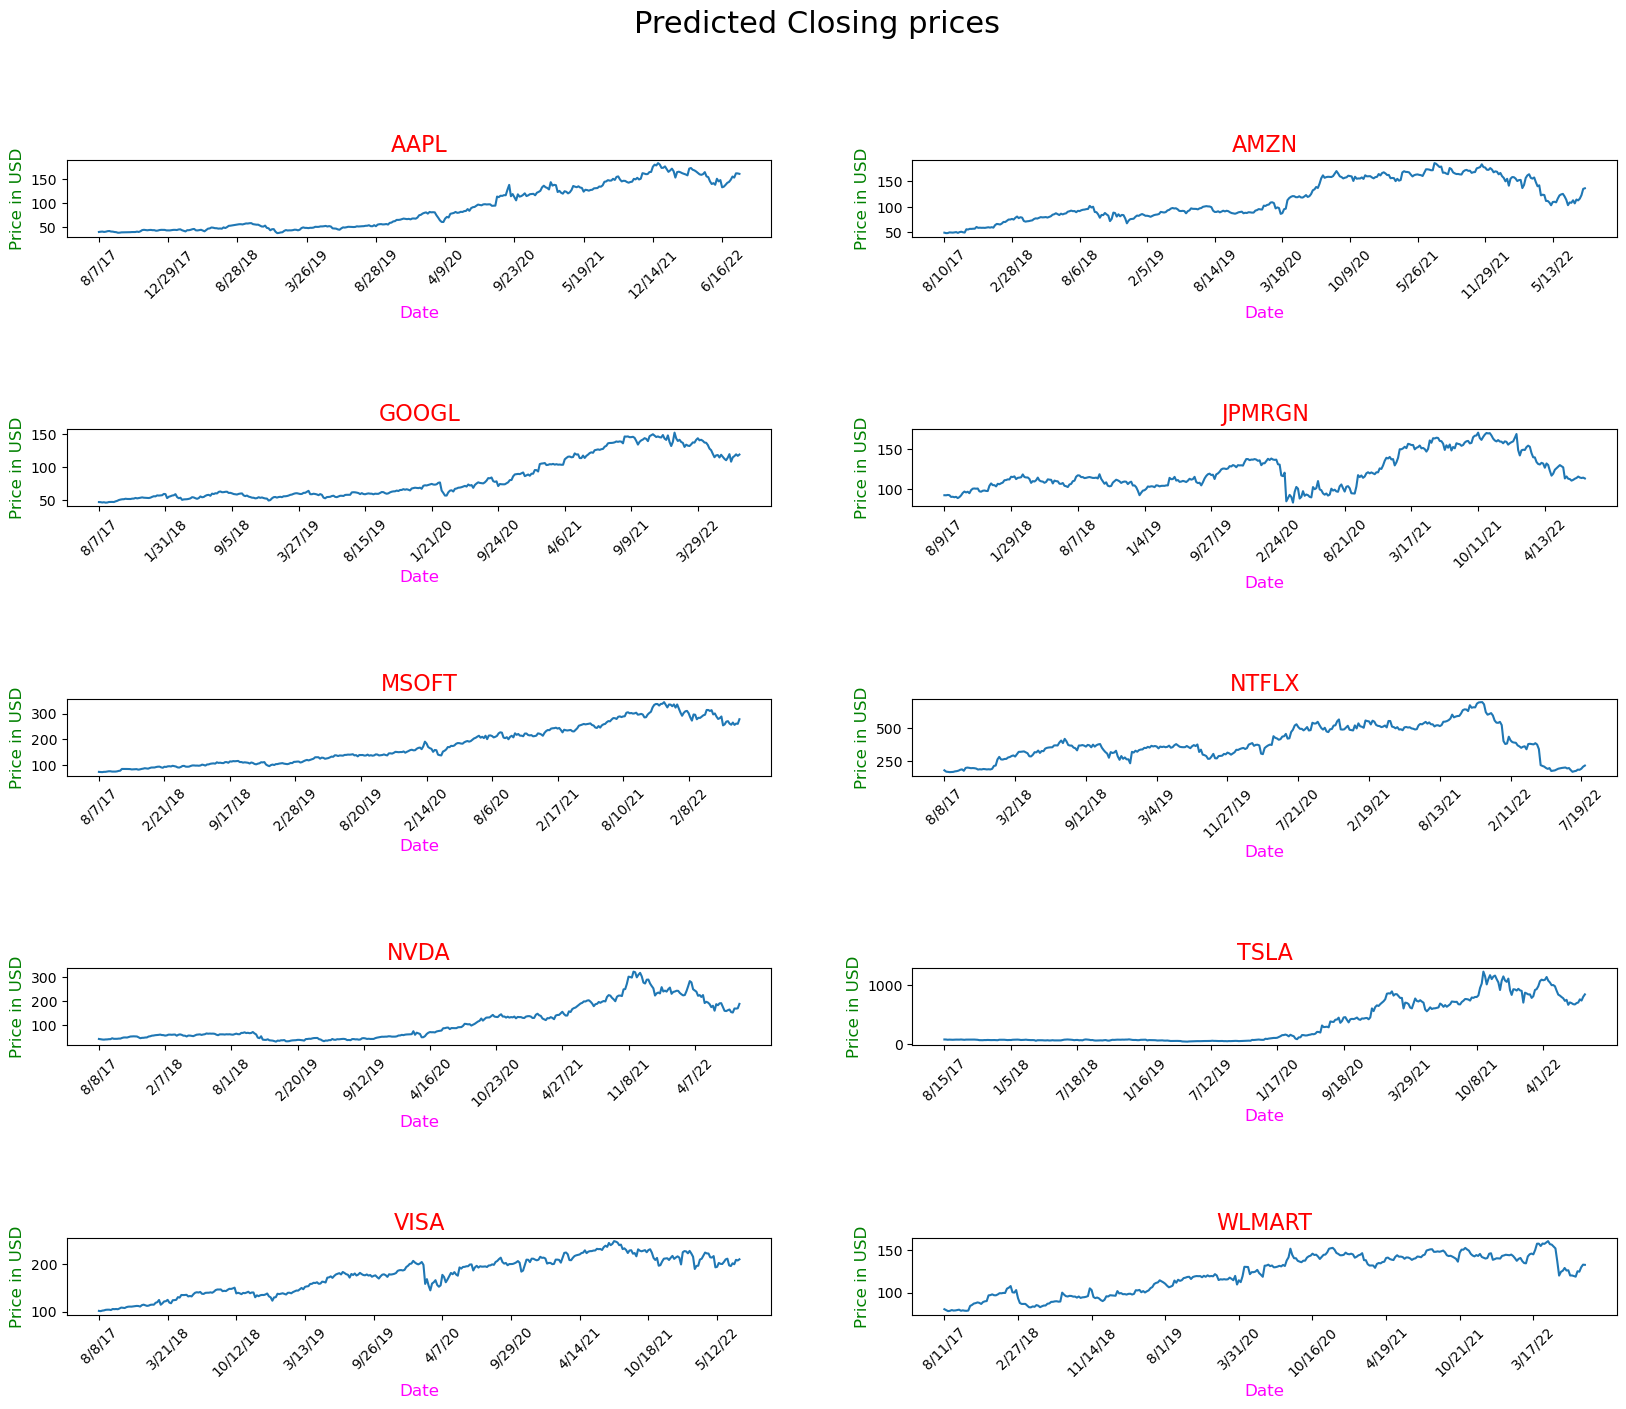

In [108]:
companies = df['Company'].unique()
dates = df['Date'].unique()

pred = pd.read_csv("predicted_data.csv")
pred['Company'].replace('JP-MRGN', 'JPMRGN', inplace=True)
pred['Company'].replace('M-SOFT', 'MSOFT', inplace=True)

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 15))
plt.subplots_adjust(hspace=2.5)
fig.suptitle("Predicted Closing prices", fontsize=22)

# loop through companies and axes


for comp, ax in zip(companies, axs.ravel()):
    dates = pred[pred['Company']==comp]["Date"]
    ax.plot(dates,pred[pred['Company']==comp]["Predicted_Close"])
    # chart formatting
    xticks = dates[::40]
    ax.set_xticks(xticks, rotation=45)
    ax.set_title(comp.upper(), fontsize=16, color = 'r')
    ax.set_xticklabels(xticks,rotation=45)
    ax.set_xlabel("Date", fontsize=12, color = 'magenta')
    ax.set_ylabel('Price in USD', fontsize = 12, color = 'g')
    

plt.show()

# Ridge Regression


In [118]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [119]:
var=['Open', 'Volume',
       'Company_AAPL', 'Company_AMZN', 'Company_GOOGL', 'Company_JPMRGN',
       'Company_MSOFT', 'Company_NTFLX', 'Company_NVDA', 'Company_TSLA',
       'Company_VISA']
x = df_dummy[var]
y= df_dummy['Close']

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [121]:
X_test.shape

(3774, 11)

In [122]:
# Define the Ridge regression model
ridge = Ridge()

# Define the hyperparameter grid to search over
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Perform grid search to find the best hyperparameters
ridge_grid = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5)
ridge_grid.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters: ", ridge_grid.best_params_)
print("Best score: ", ridge_grid.best_score_)

# Use the best hyperparameters to fit the model and make predictions
best_ridge_model = ridge_grid.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test)


Best hyperparameters:  {'alpha': 1000}
Best score:  0.9984612334041019


In [123]:
best_ridge_model.coef_,

(array([ 9.99222470e-01, -1.18790536e-09,  5.16252546e-02, -1.99717263e-02,
        -3.91559117e-02, -2.91259899e-02, -3.84688718e-03,  5.19529071e-02,
        -5.47297435e-02,  1.68126596e-01, -7.58657482e-02]),)

In [124]:
print("Co-efficents: ")

for i in range(len(var)):
  print('{} : {}'.format(var[i], best_ridge_model.coef_[i].transpose()) )

print("\n Intercept = ", best_ridge_model.intercept_)

Co-efficents: 
Open : 0.9992224700060124
Volume : -1.1879053628511405e-09
Company_AAPL : 0.05162525455325185
Company_AMZN : -0.019971726341392666
Company_GOOGL : -0.0391559117335694
Company_JPMRGN : -0.029125989918073275
Company_MSOFT : -0.0038468871811969865
Company_NTFLX : 0.051952907080722414
Company_NVDA : -0.05472974351161087
Company_TSLA : 0.16812659610180608
Company_VISA : -0.07586574816419199

 Intercept =  0.20924229024890906


Text(0.5, 1.0, 'Ridge Regression Model')

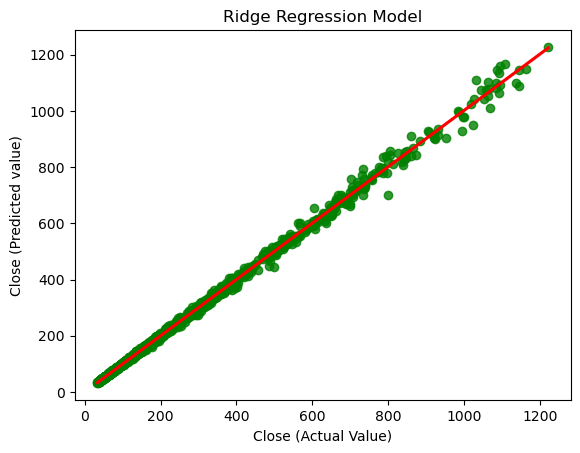

In [125]:
sns.regplot(x=Y_test,y=y_pred_ridge,ci=None,scatter_kws={"color": "green"}, line_kws={"color": "red"});
plt.xlabel('Close (Actual Value)')
plt.ylabel('Close (Predicted value)')
plt.title('Ridge Regression Model')